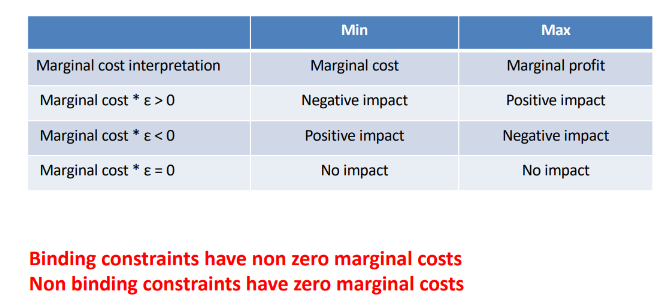
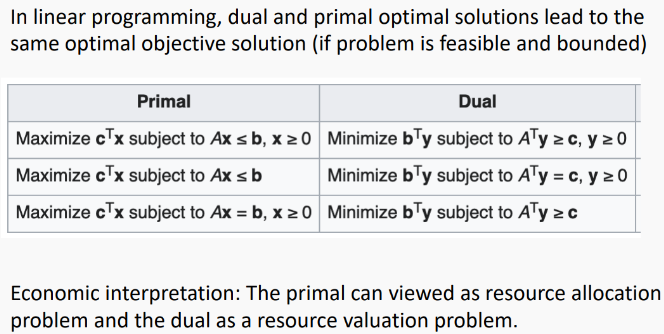

### Sensitivity
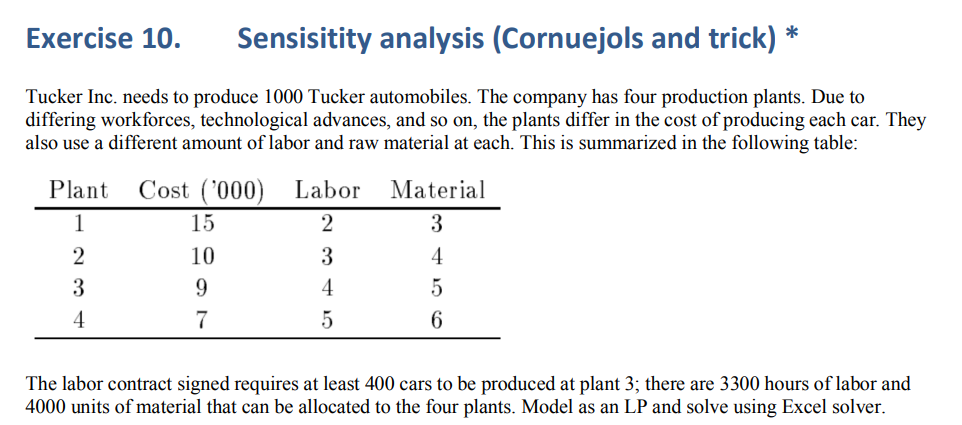

In [25]:
from scipy.optimize import linprog

# Coefficients for the objective function (costs in thousands)
c = [15, 10, 9, 7]

# Coefficients for the inequality constraints (labor and material)
A = [
    [2, 3, 4, 5],  # Labor hours
    [3, 4, 5, 6]   # Material units
]

# Right-hand side of the inequality constraints
b = [3300, 4000]

# Coefficients for the equality constraints (total production)
A_eq = [
    [1, 1, 1, 1],  # Total production
]

# Right-hand side of the equality constraints
b_eq = [1000]

# Bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (400, None)  # Plant 3 must produce at least 400 cars
x3_bounds = (0, None)

# Apply the bounds
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]

# Solve the problem
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the result
result_x = result.x if result.success else [0, 0]
result_x, result.fun if result.success else 0

print("the result is: ",result.fun, "Of final costs")

the result is:  11600.0 Of final costs


In [36]:
import pandas as pd
import numpy as np
result1 = np.array(result.x)
result1 = pd.DataFrame(result1, columns=['Production per fabrict'])
result1

,Production per fabrict
0,400.0
1,200.0
2,400.0
3,0.0


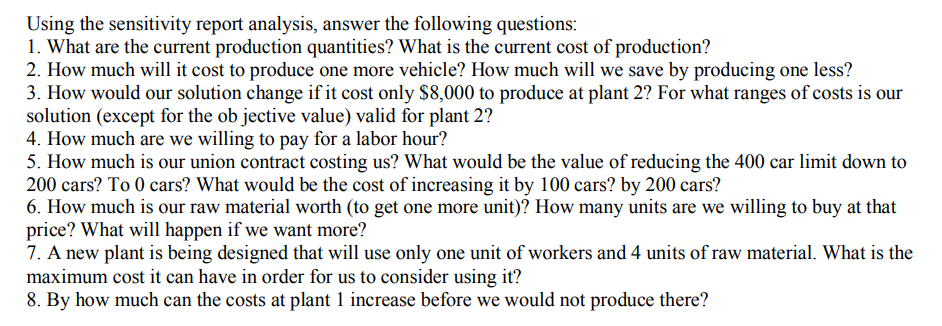

- What are the current production quantities? What is the current cost of production?
- How much will it cost to produce one more vehicle? How much will we save by producing one less?
- How would our solution change if it cost only $8,000 to produce at plant 2? For what ranges of costs is our solution (except for the obj objective value) valid for plant 2?
- How much are we willing to pay for a labor hour?
- How much is our union contract costing us? What would be the value of reducing the 400 car limit down to 200 cars? To 0 cars? What would be the cost of increasing it by 100 cars? by 200 cars?
- How much is our raw material worth (to get one more unit)? How many units are we willing to buy at that price? What will happen if we want more?
- A new plant is being designed that will use only one unit of workers and 4 units of raw material. What is the maximum cost it can have in order for us to consider using it?
- By how much can the costs at plant 1 increase before we would not produce there?

In [35]:
# Coefficients for the objective function (costs in thousands)
c = [15, 10, 9, 7]

# Coefficients for the inequality constraints (labor and material)
A = [
    [2, 3, 4, 5],  # Labor hours
    [3, 4, 5, 6]   # Material units
]

# Original constraints
original_b = [3300, 4000]

# Original production requirements
original_b_eq = [1000]

# Bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (400, None)  # Plant 3 must produce at least 400 cars
x3_bounds = (0, None)

# Apply the bounds
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]

# Adjusted constraints for sensitivity analysis
adjusted_bs = [
    [3301, 4000],  # Increase available labor by 1
    [3300, 4001],  # Increase available material by 1
    [3299, 4000],  # Decrease available labor by 1
    [3300, 3999],  # Decrease available material by 1
]

# Adjusted production requirements for sensitivity analysis
adjusted_b_eqs = [
    [1001],  # Increase total production requirement by 1
    [999]    # Decrease total production requirement by 1
]

# Solve the problem for each adjusted constraint set
adjusted_results = []
for adjusted_b in adjusted_bs:
    adjusted_result = linprog(c, A_ub=A, b_ub=adjusted_b, A_eq=A_eq, b_eq=original_b_eq, bounds=bounds, method='highs')
    adjusted_cost = adjusted_result.fun if adjusted_result.success else None
    adjusted_results.append((adjusted_result.x if adjusted_result.success else [0, 0, 0, 0], adjusted_cost))

# Solve the problem for each adjusted production requirement
for adjusted_b_eq in adjusted_b_eqs:
    adjusted_result = linprog(c, A_ub=A, b_ub=original_b, A_eq=A_eq, b_eq=adjusted_b_eq, bounds=bounds, method='highs')
    adjusted_cost = adjusted_result.fun if adjusted_result.success else None
    adjusted_results.append((adjusted_result.x if adjusted_result.success else [0, 0, 0, 0], adjusted_cost))

# Create a DataFrame to display the results in a table
adjusted_constraints = [
    "Increase available labor by 1",
    "Increase available material by 1",
    "Decrease available labor by 1",
    "Decrease available material by 1",
    "Increase total production requirement by 1",
    "Decrease total production requirement by 1"
]

df_results = pd.DataFrame({
    "Adjustment": adjusted_constraints,
    "Production at Plant 1": [result[0][0] for result in adjusted_results],
    "Production at Plant 2": [result[0][1] for result in adjusted_results],
    "Production at Plant 3": [result[0][2] for result in adjusted_results],
    "Production at Plant 4": [result[0][3] for result in adjusted_results],
    "Total Cost": [result[1] for result in adjusted_results]
})

df_results

,Adjustment,Production at Plant 1,Production at Plant 2,Production at Plant 3,Production at Plant 4,Total Cost
0,Increase available labor by 1,400.0,200.0,400.0,0.0,11600.0
1,Increase available material by 1,399.0,201.0,400.0,0.0,11595.0
2,Decrease available labor by 1,400.0,200.0,400.0,0.0,11600.0
3,Decrease available material by 1,401.0,199.0,400.0,0.0,11605.0
4,Increase total production requirement by 1,404.0,197.0,400.0,0.0,11630.0
5,Decrease total production requirement by 1,396.0,203.0,400.0,0.0,11570.0


In [33]:
import pandas as pd
df_results1 = df_results
# Assuming df_results is your DataFrame
df_results1['shadow prices'] = df_results['Total Cost'] - 11600.0
df_results1

,Adjustment,Production at Plant 1,Production at Plant 2,Production at Plant 3,Production at Plant 4,Total Cost,shadow prices
0,Increase available labor by 1,400.0,200.0,400.0,0.0,11600.0,0.0
1,Increase available material by 1,399.0,201.0,400.0,0.0,11595.0,-5.0
2,Decrease available labor by 1,400.0,200.0,400.0,0.0,11600.0,0.0
3,Decrease available material by 1,401.0,199.0,400.0,0.0,11605.0,5.0
4,Increase total production requirement by 1,404.0,197.0,400.0,0.0,11630.0,30.0
5,Decrease total production requirement by 1,396.0,203.0,400.0,0.0,11570.0,-30.0
